In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import statsmodels.api as sm

In [94]:
mat = pd.read_csv("student-mat.csv", sep=';')
por = pd.read_csv("student-por.csv", sep=';')

mat.columns = ['school','sex','age','address','family_size','parents_status','mother_education','father_education',
              'mother_job','father_job','reason','guardian','commute_time','study_time','failures','school_support',
              'family_support','paid_classes','activities','nursery','desire_higher_edu','internet','romantic','family_quality',
              'free_time','go_out','weekday_alcohol','weekend_alcohol','health','absences','period1_score','period2_score','final_score']

por.columns = ['school','sex','age','address','family_size','parents_status','mother_education','father_education',
              'mother_job','father_job','reason','guardian','commute_time','study_time','failures','school_support',
              'family_support','paid_classes','activities','nursery','desire_higher_edu','internet','romantic','family_quality',
              'free_time','go_out','weekday_alcohol','weekend_alcohol','health','absences','period1_score','period2_score','final_score']

In [81]:
mat.head(5)
mat

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,...,family_quality,free_time,go_out,weekday_alcohol,weekend_alcohol,health,absences,period1_score,period2_score,final_score
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [47]:
df.columns = ['school','sex','age','address','family_size','parents_status','mother_education','father_education',
              'mother_job','father_job','reason','guardian','commute_time','study_time','failures','school_support',
              'family_support','paid_classes','activities','nursery','desire_higher_edu','internet','romantic','family_quality',
              'free_time','go_out','weekday_alcohol','weekend_alcohol','health','absences','period1_score','period2_score','final_score']

In [48]:
# convert final_score to categorical variable # Good:15~20 Fair:10~14 Poor:0~9
df['final_grade'] = 'na'
df.loc[(df.final_score >= 15) & (df.final_score <= 20), 'final_grade'] = 'good' 
df.loc[(df.final_score >= 10) & (df.final_score <= 14), 'final_grade'] = 'fair' 
df.loc[(df.final_score >= 0) & (df.final_score <= 9), 'final_grade'] = 'poor' 
df.head(5)

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,...,free_time,go_out,weekday_alcohol,weekend_alcohol,health,absences,period1_score,period2_score,final_score,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,poor
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,poor
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,fair
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,good
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,fair


In [49]:
mat['G3']

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

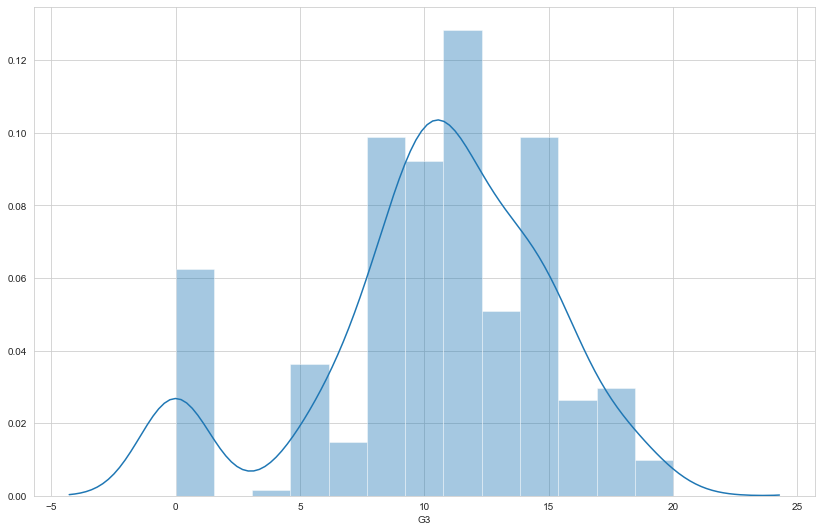

In [50]:
plt.figure(figsize=(14, 9))
sns.distplot(mat['G3'])

C:\Users\Jeheon Kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
C:\Users\Jeheon Kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
C:\Users\Jeheon Kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
C:\Users\Jeheon Kim\Anaconda3\lib\site-

Text(0.5, 1.0, 'Density Plot of Final Grades by Mother education level')

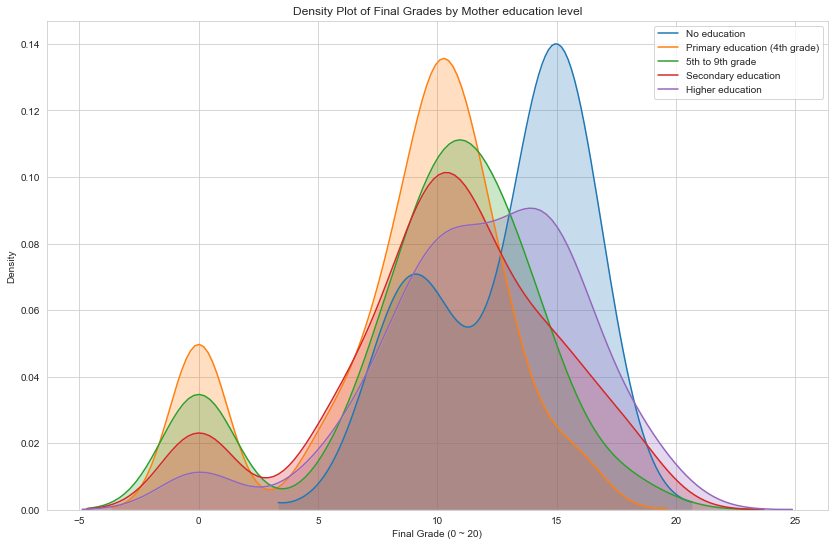

In [75]:
plt.figure(figsize=(14, 9))
sns.kdeplot(mat.ix[mat['Medu'] == 0, 'G3'], 
            label = 'No education ', shade = True)
sns.kdeplot(mat.ix[mat['Medu'] == 1, 'G3'], 
            label = 'Primary education (4th grade)', shade = True)
sns.kdeplot(mat.ix[mat['Medu'] == 2, 'G3'], 
            label = '5th to 9th grade', shade = True)
sns.kdeplot(mat.ix[mat['Medu'] == 3, 'G3'], 
            label = 'Secondary education', shade = True)
sns.kdeplot(mat.ix[mat['Medu'] == 4, 'G3'], 
            label = 'Higher education', shade = True)

plt.xlabel('Final Grade (0 ~ 20)')
plt.ylabel('Density')
plt.title('Density Plot of Final Grades by Mother education level')

C:\Users\Jeheon Kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
C:\Users\Jeheon Kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
C:\Users\Jeheon Kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
C:\Users\Jeheon Kim\Anaconda3\lib\site-

Text(0.5, 1.0, 'Density Plot of Final Grades by Mother education level')

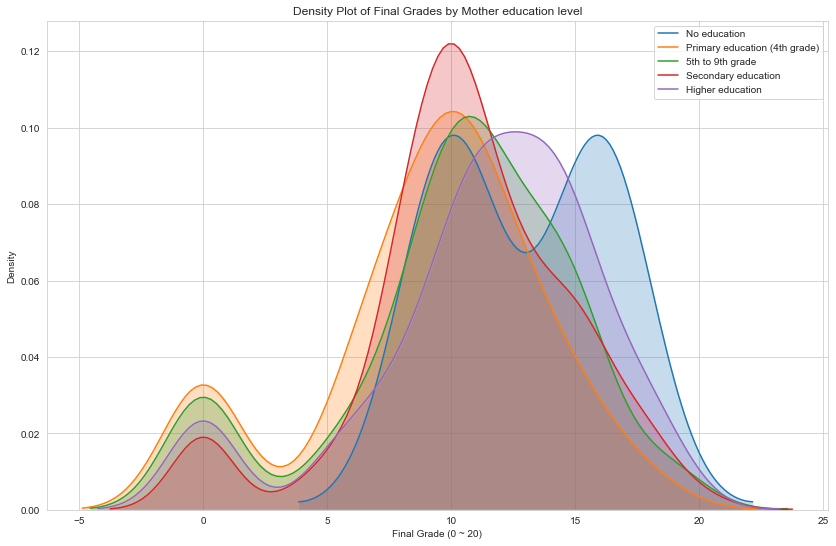

In [77]:
plt.figure(figsize=(14, 9))
sns.kdeplot(mat.ix[mat['Fedu'] == 0, 'G3'], 
            label = 'No education ', shade = True)
sns.kdeplot(mat.ix[mat['Fedu'] == 1, 'G3'], 
            label = 'Primary education (4th grade)', shade = True)
sns.kdeplot(mat.ix[mat['Fedu'] == 2, 'G3'], 
            label = '5th to 9th grade', shade = True)
sns.kdeplot(mat.ix[mat['Fedu'] == 3, 'G3'], 
            label = 'Secondary education', shade = True)
sns.kdeplot(mat.ix[mat['Fedu'] == 4, 'G3'], 
            label = 'Higher education', shade = True)

plt.xlabel('Final Grade (0 ~ 20)')
plt.ylabel('Density')
plt.title('Density Plot of Final Grades by Mother education level')

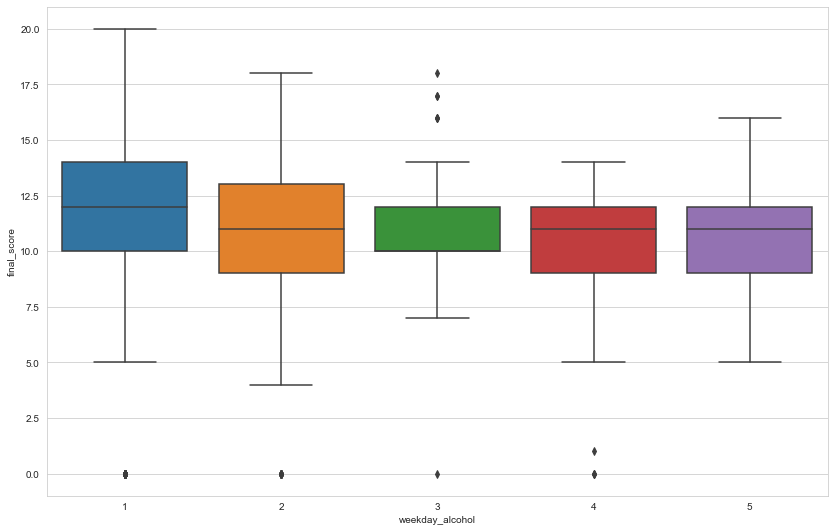

In [88]:
plt.figure(figsize=(14, 9))
sns.boxplot('weekday_alcohol','final_score',data = df)

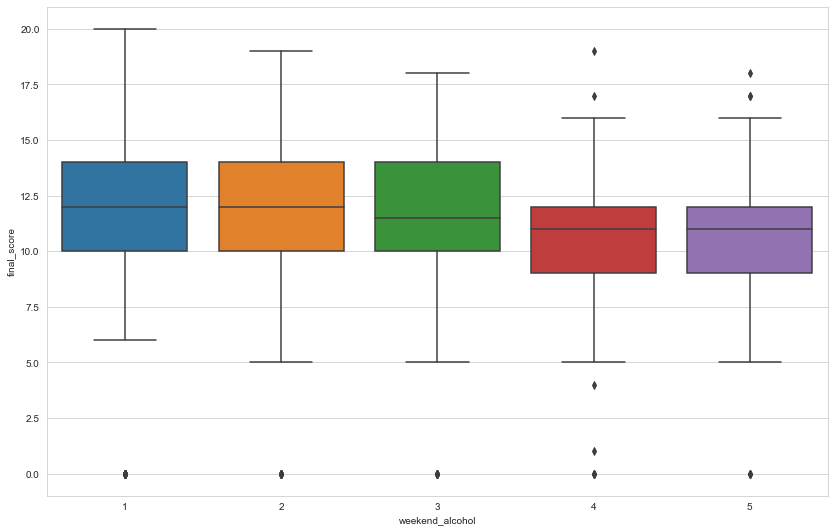

In [89]:
plt.figure(figsize=(14, 9))
sns.boxplot('weekend_alcohol','final_score',data = df)

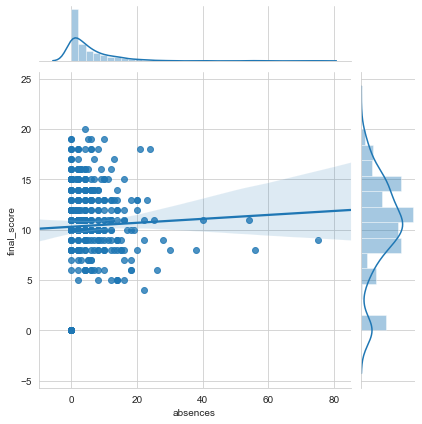

In [97]:
sns.jointplot(x='absences',y='final_score',data=mat,kind="reg")

In [98]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='multinomial', solver='newton-cg',fit_intercept=True)

In [99]:
from sklearn.feature_selection import SelectKBest, chi2

ks=[]
for i in range(1,58):
    sk = SelectKBest(chi2, k=i)
    x_new = sk.fit_transform(X_train,y_train)
    x_new_test=sk.fit_transform(X_test,y_test)
    l = lr.fit(x_new, y_train)
    ll = l.score(x_new_test, y_test)
    ks.append(ll)  
    
ks = pd.Series(ks)
ks = ks.reindex(list(range(1,58)))
ks

NameError: name 'X_train' is not defined